In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deep-learning-course-midterm/sample_submission.csv
/kaggle/input/deep-learning-course-midterm/train.csv
/kaggle/input/deep-learning-course-midterm/test.csv


In [2]:
#import the requirements
import pandas as pd

# Data Analysis and Preprocessing

In [3]:
#check the csvs
train_data = pd.read_csv("/kaggle/input/deep-learning-course-midterm/train.csv")
test_data = pd.read_csv("/kaggle/input/deep-learning-course-midterm/test.csv")

In [4]:
train_data.head()

,id,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,1,I13,N,256.0,257.0,-0.025436,-0.369672,1.529989,-0.619057,-0.079256,...,-0.036850,5.0,2.0,15.0,8.0,-0.036850,-0.175291,-0.343045,-0.511080,-0.644588
1,2,867,N,91.0,101.0,0.005207,0.205958,-0.005508,-0.512249,-0.005508,...,-0.062579,18.0,1.0,23.0,4.0,-0.062579,0.034085,0.166282,0.677930,-0.205569
2,3,106,N,291.0,287.0,0.347613,1.470143,1.424123,1.424123,-0.090802,...,-0.052524,2.0,5.0,15.0,8.0,-0.052524,-0.052524,-0.052524,-0.050269,-0.050269
3,4,49.0,N,274.0,278.0,0.023990,0.878232,0.815362,0.815362,-0.032605,...,-0.107051,1.0,5.0,14.0,8.0,-0.107051,-0.107051,-0.107051,-0.107051,-0.107051
4,5,34.0,N,242.0,242.0,0.092220,1.011302,-0.078682,-0.078682,-0.078682,...,-0.010008,19.0,3.0,27.0,5.0,-0.010008,0.004223,0.115988,0.164468,-0.013203


In [5]:
test_data.head()

,id,record,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,1,32.0,190.0,188.0,0.107335,0.432600,-0.022734,-0.022734,-0.070402,14.0,...,-0.173336,5.0,19.0,41.0,17.0,-0.173336,-0.238194,-0.310729,-0.382699,-0.442381
1,2,32.0,174.0,170.0,0.078369,0.300423,-0.039887,-0.039887,-0.076791,9.0,...,-0.076935,8.0,13.0,39.0,18.0,-0.076935,-0.113860,-0.236910,-0.322416,-0.505188
2,3,36.0,270.0,274.0,0.041601,0.603728,0.212613,0.212613,0.035339,6.0,...,0.015168,15.0,10.0,37.0,12.0,0.015168,0.019182,0.028516,-0.022568,-0.296055
3,4,205,266.0,268.0,0.010179,0.943830,0.913318,0.913318,-0.018720,10.0,...,-0.037889,6.0,3.0,18.0,9.0,-0.037889,-0.060003,-0.089765,-0.124220,-0.158533
4,5,49.0,268.0,272.0,0.021818,0.738181,0.725056,0.725056,-0.044609,30.0,...,-0.119538,0.0,6.0,13.0,7.0,-0.119538,-0.119538,-0.119538,-0.119538,-0.119538


In [6]:
train_data.columns

Index(['id', 'record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

In [7]:
train_data.describe()

,id,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,770923.000000,709850.000000,709850.000000,709850.000000,709850.000000,709850.000000,709850.000000,709850.000000,709850.000000,709850.000000,...,631220.000000,631220.000000,631220.000000,631220.000000,631220.000000,631220.000000,631220.000000,631220.000000,631220.000000,631220.000000
mean,385462.000000,201.009236,201.059607,0.058705,0.438354,0.524657,-0.374096,-0.126095,17.876041,9.843125,...,-0.199521,8.542500,8.444831,27.738696,10.751366,-0.199521,-0.207515,-0.215045,-0.231361,-0.355536
std,222546.445124,79.698682,80.701501,0.189891,0.655704,0.756126,0.695246,0.276728,13.897318,9.511780,...,0.267963,9.437241,7.374284,15.446795,7.289246,0.267963,0.282529,0.374879,0.463753,0.452984
min,1.000000,2.000000,0.000000,-4.208601,-7.959463,-7.113196,-7.971319,-7.113196,0.000000,1.000000,...,-5.481982,0.000000,1.000000,2.000000,1.000000,-5.481982,-4.013603,-4.013603,-3.991484,-4.520327
25%,192731.500000,140.000000,140.000000,-0.027872,-0.020488,-0.027783,-0.693473,-0.141755,7.000000,4.000000,...,-0.269285,3.000000,3.000000,17.000000,5.000000,-0.269285,-0.300047,-0.386092,-0.473039,-0.557039
50%,385462.000000,202.000000,202.000000,0.024152,0.220803,0.422011,-0.359345,-0.074300,16.000000,7.000000,...,-0.125602,5.000000,6.000000,25.000000,9.000000,-0.125602,-0.151812,-0.207980,-0.256680,-0.334428
75%,578192.500000,258.000000,258.000000,0.100098,0.954564,0.962760,-0.030453,-0.029080,26.000000,14.000000,...,-0.032971,11.000000,12.000000,36.000000,16.000000,-0.032971,-0.022679,0.013066,0.042724,-0.070460
max,770923.000000,2228.000000,10964.000000,10.565904,4.633166,4.598265,4.018918,3.129033,203.000000,150.000000,...,4.033554,260.000000,185.000000,400.000000,177.000000,4.033554,3.585718,4.002332,3.755566,3.575504


In [8]:
train_data.isnull().sum()

id                     0
record             61073
type               61073
0_pre-RR           61073
0_post-RR          61073
0_pPeak            61073
0_tPeak            61073
0_rPeak            61073
0_sPeak            61073
0_qPeak            61073
0_qrs_interval     61073
0_pq_interval      61073
0_qt_interval      61073
0_st_interval      61073
0_qrs_morph0       61073
0_qrs_morph1       61073
0_qrs_morph2       61073
0_qrs_morph3       61073
0_qrs_morph4       61073
1_pre-RR          139703
1_post-RR         139703
1_pPeak           139703
1_tPeak           139703
1_rPeak           139703
1_sPeak           139703
1_qPeak           139703
1_qrs_interval    139703
1_pq_interval     139703
1_qt_interval     139703
1_st_interval     139703
1_qrs_morph0      139703
1_qrs_morph1      139703
1_qrs_morph2      139703
1_qrs_morph3      139703
1_qrs_morph4      139703
dtype: int64

In [9]:
train_data.shape, test_data.shape

((770923, 35), (142675, 34))

In [10]:
train_data = train_data[~train_data["type"].isnull()]
train_data.shape

(709850, 35)

In [11]:
train_data["type"].value_counts()

type
N       647338
VEB      41384
SVEB     14821
Q         5314
F          993
Name: count, dtype: int64

In [12]:
train_data = train_data.drop(["id","record"], axis=1)

In [13]:
mapping_dict = {'F':0, 'N':1, 'Q': 2, 'SVEB': 3, 'VEB': 4}
mapping_dict.get('F')

0

In [14]:
X = train_data.drop("type", axis=1)
y = train_data["type"].values

mapping_dict = {'F':0, 'N':1, 'Q': 2, 'SVEB': 3, 'VEB': 4}
y = np.array([mapping_dict.get(labels) for labels in y])

In [15]:
X.isnull().sum()

0_pre-RR               0
0_post-RR              0
0_pPeak                0
0_tPeak                0
0_rPeak                0
0_sPeak                0
0_qPeak                0
0_qrs_interval         0
0_pq_interval          0
0_qt_interval          0
0_st_interval          0
0_qrs_morph0           0
0_qrs_morph1           0
0_qrs_morph2           0
0_qrs_morph3           0
0_qrs_morph4           0
1_pre-RR          139703
1_post-RR         139703
1_pPeak           139703
1_tPeak           139703
1_rPeak           139703
1_sPeak           139703
1_qPeak           139703
1_qrs_interval    139703
1_pq_interval     139703
1_qt_interval     139703
1_st_interval     139703
1_qrs_morph0      139703
1_qrs_morph1      139703
1_qrs_morph2      139703
1_qrs_morph3      139703
1_qrs_morph4      139703
dtype: int64

In [16]:
#fill the missing values with mean
from sklearn.impute import SimpleImputer
import numpy as np

imp_mean = SimpleImputer(strategy='mean')
X = imp_mean.fit_transform(X)

In [17]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
set(list(y))

{0, 1, 2, 3, 4}

In [19]:
#split into train and validation sets with stratified splitting
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
#standardize the 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [21]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((567880, 32), (567880,), (141970, 32), (141970,))

In [22]:
#prepare test data for prediction
test_X = test_data.drop(['id','record'], axis=1).values
X_test = scaler.transform(test_X)
X_test

array([[-0.13883751, -0.16390309,  0.25625729, ..., -0.31147488,
        -0.39473789, -0.23255012],
       [-0.33946661, -0.39000832,  0.10366609, ..., -0.10060132,
        -0.25536224, -0.38058446],
       [ 0.86430797,  0.91637745, -0.09002963, ...,  0.65761483,
         0.43788704,  0.11233587],
       ...,
       [ 0.04925227,  0.04964074, -0.3777879 , ...,  0.87682333,
         0.6832324 ,  0.06240269],
       [ 0.22480272,  1.41883351,  0.41049256, ...,  0.24196368,
         0.25488222,  0.63002995],
       [-1.19214027, -1.8345695 , -0.82387094, ...,  0.54176287,
         0.89380819,  1.89449612]])

In [23]:
#turn to tensors 
import torch
import torch.nn as nn

X_train = torch.FloatTensor(X_train).unsqueeze(1)
X_val = torch.FloatTensor(X_val).unsqueeze(1)
X_test = torch.FloatTensor(X_test).unsqueeze(1)
y_train = torch.LongTensor(y_train)
y_val = torch.LongTensor(y_val)

In [24]:
#pytorch dataset
from torch.utils.data import Dataset, DataLoader

class MidtermDataset(Dataset):
    def __init__(self, X, y=None): #y=None to address for the test data
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        return self.X[idx]

In [25]:
#instantiate train and validation dataset
train_dataset = MidtermDataset(X_train, y_train)
val_dataset = MidtermDataset(X_val, y_val)

In [26]:
#create dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Model

In [27]:
#define model (CNN model)

class CNNModel(nn.Module):
    def __init__(self, num_features=32, num_classes=5):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=5, padding=2)
        self.pool = nn.MaxPool1d(2, ceil_mode=True)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.global_avg = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(32, 64)
        self.fc2 = nn.Linear(64, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.global_avg(x).squeeze(-1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
        

In [28]:
#instantiate the model
torch.manual_seed(42)
model = CNNModel()

In [29]:
#device (for device agnostic code)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#put model to the device
model = model.to(device)

In [30]:
#loss function
loss_fn = nn.CrossEntropyLoss()

In [31]:
#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [32]:
#number of parameters in the model
params_num = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {params_num}")

Number of parameters: 4101


In [33]:
#setup the accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [34]:
#Training and evaluations
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from timeit import default_timer as timer
from tqdm.auto import tqdm

#for replication of the code
torch.manual_seed(42)

#start timer for our training loop
start = timer()

#define number of epochs
num_epochs = 10

#track the losses and accuracies
train_loss = []
eval_loss = []
train_acc = []
eval_acc = []

for epoch in tqdm(range(num_epochs)):
    #set model to training mode
    model.train()

    training_loss = 0
    training_acc = 0

    #loop through each batch for training
    for batch, (X, y) in enumerate(train_dataloader):
        #put data to device
        X, y = X.to(device), y.to(device)

        #zero the gradients from last batch
        optimizer.zero_grad()

        #forward pass
        y_pred = model(X)

        #calculate loss
        loss = loss_fn(y_pred, y)

        #calculate gradients(backward pass)
        loss.backward()

        #update the parameters
        optimizer.step()

        training_loss += loss.item()

        #calculate training accuracy
        training_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    training_loss /= len(train_dataloader)
    train_loss.append(training_loss)

    training_acc /= len(train_dataloader)
    train_acc.append(training_acc)

    # evaluation
    evaluation_loss, evaluation_acc = 0, 0
    all_val_preds = []
    all_val_targets = []

    #set model to evaluation mode
    model.eval()

    with torch.inference_mode():
        for X, y in val_dataloader:
            #put data to device
            X, y = X.to(device), y.to(device)

            #Forward pass
            test_pred = model(X)

            #test loss
            evaluation_loss += loss_fn(test_pred, y).item() # accumulatively add up the loss per epoch

            #test accuracy
            evaluation_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

            # Collect predictions and targets for precision/recall
            _, preds = torch.max(test_pred, 1)
            all_val_preds.extend(preds.cpu().numpy())
            all_val_targets.extend(y.cpu().numpy())

        evaluation_loss /= len(val_dataloader)
        eval_loss.append(evaluation_loss)

        evaluation_acc /= len(val_dataloader)
        eval_acc.append(evaluation_acc)

        # Compute weighted precision and recall
        weighted_precision, weighted_recall, _, _ = precision_recall_fscore_support(all_val_targets, all_val_preds, average='weighted')

    ## Print out what's happening
    print(f"Epoch: {epoch} \nTrain loss: {training_loss:.5f} | Train acc: {training_acc:.2f}\n Val loss: {evaluation_loss:.5f} | Val acc: {evaluation_acc:.2f} | Val weighted precision: {weighted_precision*100:.4f} | Val weighted recall: {weighted_recall*100:.4f}\n")


end = timer()

#print time taken for training and evaluation
total_time_taken = end-start
print(f'Total time taken for training and evaluations: {total_time_taken} seconds')

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 
Train loss: 0.19130 | Train acc: 94.74
 Val loss: 0.12526 | Val acc: 95.98 | Val weighted precision: 95.4486 | Val weighted recall: 95.9759



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 
Train loss: 0.13051 | Train acc: 96.05
 Val loss: 0.12746 | Val acc: 96.30 | Val weighted precision: 95.7446 | Val weighted recall: 96.3020



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 
Train loss: 0.11626 | Train acc: 96.47
 Val loss: 0.09586 | Val acc: 96.99 | Val weighted precision: 96.6727 | Val weighted recall: 96.9895



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 
Train loss: 0.10854 | Train acc: 96.70
 Val loss: 0.09366 | Val acc: 97.08 | Val weighted precision: 96.8243 | Val weighted recall: 97.0747

Epoch: 4 
Train loss: 0.10435 | Train acc: 96.82
 Val loss: 0.08786 | Val acc: 97.26 | Val weighted precision: 97.1521 | Val weighted recall: 97.2558

Epoch: 5 
Train loss: 0.10022 | Train acc: 96.94
 Val loss: 0.08985 | Val acc: 97.22 | Val weighted precision: 97.0419 | Val weighted recall: 97.2149

Epoch: 6 
Train loss: 0.09702 | Train acc: 97.04
 Val loss: 0.08724 | Val acc: 97.24 | Val weighted precision: 97.0160 | Val weighted recall: 97.2438

Epoch: 7 
Train loss: 0.09558 | Train acc: 97.09
 Val loss: 0.08640 | Val acc: 97.35 | Val weighted precision: 97.2476 | Val weighted recall: 97.3473

Epoch: 8 
Train loss: 0.09370 | Train acc: 97.16
 Val loss: 0.07941 | Val acc: 97.49 | Val weighted precision: 97.3333 | Val weighted recall: 97.4910

Epoch: 9 
Train loss: 0.09193 | Train acc: 97.21
 Val loss: 0.09042 | Val acc: 97.28 | Val wei

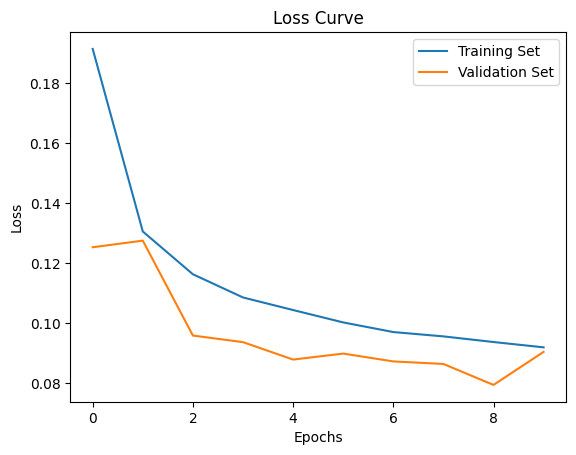

In [35]:
import matplotlib.pyplot as plt
def plot_loss_curve(train_losses_list, validation_losses_list):
    # Plot
    plt.figure()
    plt.plot(train_losses_list, label='Training Set')
    plt.plot(validation_losses_list, label='Validation Set')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plot_loss_curve(train_loss, eval_loss)

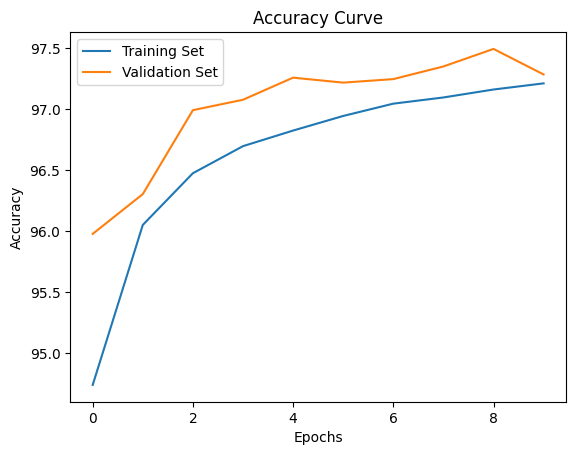

In [36]:
import matplotlib.pyplot as plt
def plot_loss_curve(train_acc_list, validation_acc_list):
    # Plot
    plt.figure()
    plt.plot(train_acc_list, label='Training Set')
    plt.plot(validation_acc_list, label='Validation Set')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plot_loss_curve(train_acc, eval_acc)

In [37]:
#save the model
torch.save(obj=model.state_dict(), f="model.pth")

In [38]:
import json
def estimate_flops(model, input_shape):
    """
    Estimate FLOPs for Linear, Conv1d, and Conv2d layers only.
    Args:
        model (nn.Module): PyTorch model
        input_shape (tuple): shape of one input sample, e.g., (1, 3, 224, 224) for 2D or (1, 1, 32) for 1D
    Returns:
        total_flops (int)
    """
    flops = 0

    def count_layer(module, input, output):
        nonlocal flops
        if isinstance(module, nn.Conv1d):
            out_l = output.shape[2]
            kernel_ops = module.kernel_size[0]
            flops += kernel_ops * module.in_channels * module.out_channels * out_l
        elif isinstance(module, nn.Conv2d):
            out_h, out_w = output.shape[2:]
            kernel_ops = module.kernel_size[0] * module.kernel_size[1]
            flops += kernel_ops * module.in_channels * module.out_channels * out_h * out_w
        elif isinstance(module, nn.Linear):
            flops += module.in_features * module.out_features

    hooks = []
    for layer in model.modules():
        if isinstance(layer, (nn.Conv1d, nn.Conv2d, nn.Linear)):
            hooks.append(layer.register_forward_hook(count_layer))

    dummy = torch.randn(input_shape).to(device)
    with torch.no_grad():
        model(dummy)

    for h in hooks:
        h.remove()

    return flops


def save_model_stats(model, input_dim, save_path="model_stats.json"):
    """
    Save parameter count and estimated FLOPs to JSON (no thop needed).
    Args:
        model (nn.Module): PyTorch model
        input_dim (int or tuple): Input feature dimension or shape
        save_path (str): Output JSON path
    """
    # Create dummy input shape
    if isinstance(input_dim, int):
        input_shape = (1, 1, input_dim)  # Assume 1D for int (batch, channels, length)
    else:
        input_shape = (1, *input_dim)

    # Count parameters
    total_params = sum(p.numel() for p in model.parameters())

    # Estimate FLOPs
    flops = estimate_flops(model, input_shape)

    # Format into M (millions)
    stats = {
        "flops": f"{flops/1e6:.3f}M",
        "num_parameters": f"{total_params/1e6:.3f}M"
    }

    with open(save_path, 'w') as f:
        json.dump(stats, f)

    return stats

In [39]:
#predict on the test set
model.eval()

#dataset and dataloader
test_dataset = MidtermDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

predictions = []
with torch.inference_mode():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())

In [40]:
# saving submission file
stats = save_model_stats(model, input_dim=X_train.shape[1], save_path="best_model_info.json")
preds = pd.DataFrame({
    "id": test_data['id'],
    "preds_res": predictions,
    "model_info": json.dumps(stats)
})


In [41]:
preds.to_csv("submission.csv", index=False)